In [44]:
# Common packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from seaborn import set_style, pairplot

set_style("whitegrid")

## Import Data

In [45]:
data_Cancer = pd.read_pickle('cancer_data_cleaned.pkl')

In [46]:
data_Cardiovascular = pd.read_pickle('cardiovascular_data_cleaned.pkl')

In [47]:
data_Respiratory = pd.read_pickle('respiratory_data_cleaned.pkl')

In [48]:
data = pd.concat([data_Cancer, data_Cardiovascular, data_Respiratory])
data.keys()
data

,Rank,Title,Status,Study Results,Conditions,Interventions,Outcome Measures,Gender,Age,Phases,...,Locations,URL,Actual,Estimated,Countries,EFraction,Intervention,Age_Type,Disease,Months
NCT Number,,,,,,,,,,,,,,,,,,,,,
3254875,1,Rehabilitation After Breast Cancer,1,No Results Available,Breast Cancer,Behavioral: Individually tailored nurse naviga...,Distress|Depression|Anxiety|Health related qua...,0.0,"18 Years and older (Adult, Older Adult)",Not Applicable,...,"Rigshospitalet, Copenhagen, Denmark",https://ClinicalTrials.gov/show/NCT03254875,309.0,324.0,[Denmark],0.953704,1,3,cancer,43.0
3736746,2,Testing Feasibility of Motivational Interviewi...,1,No Results Available,Other Cancer,Behavioral: Motivational Interviewing,Feasibility of Motivational Interviewing inter...,2.0,"18 Years and older (Adult, Older Adult)",Not Applicable,...,"Dana Farber Cancer Institute, Boston, Massachu...",https://ClinicalTrials.gov/show/NCT03736746,54.0,54.0,[United States],1.000000,1,3,cancer,9.0
3865654,3,Individualizing Surveillance Mammography for O...,1,No Results Available,Breast Cancer,Other: Communication Tool,Rate of change in intentions for mammography i...,0.0,75 Years and older (Older Adult),Not Applicable,...,"Dana-Farber Cancer Institute, Boston, Massachu...",https://ClinicalTrials.gov/show/NCT03865654,45.0,45.0,[United States],1.000000,10,4,cancer,26.0
2078089,4,Oxcarbazepine Plus Morphine in Patients With R...,0,No Results Available,Cancer,Drug: Morphine|Drug: Oxcarbazepine,Number of patients with adverse events as a me...,2.0,"18 Years and older (Adult, Older Adult)",Phase 1,...,"Indiana Univeristy Health Hospital, Indianapol...",https://ClinicalTrials.gov/show/NCT02078089,1.0,12.0,[United States],0.083333,0,3,cancer,9.0
3913936,6,"Young, Empowered & Strong (YES): The Young Wom...",1,No Results Available,Breast Cancer,Other: YES portal,Frequency of logging into the portal.|Time spe...,0.0,18 Years to 44 Years (Adult),Not Applicable,...,"Dana Farber Cancer Institute, Boston, Massachu...",https://ClinicalTrials.gov/show/NCT03913936,30.0,30.0,[United States],1.000000,10,2,cancer,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405310,9996,Convalescent Plasma of Covid-19 to Treat SARS-...,1,No Results Available,SARS Pneumonia,Biological: Convalescent Plasma of patients wi...,Death|Lenth of stay ICU|Days of Mechanical Ven...,2.0,"18 Years to 70 Years (Adult, Older Adult)",Phase 2,...,"Hospital Nava de Alta Especialidad, Mexico Cit...",https://ClinicalTrials.gov/show/NCT04405310,42.0,80.0,[Mexico],0.525000,5,3,respiratory,7.0
1187147,9997,Effects of Green Tea Extract (GTE) on Systemic...,1,No Results Available,Asthma,Dietary Supplement: green tea extract,Serum Inflammatory markers|Respiratory symptoms,2.0,"18 Years to 70 Years (Adult, Older Adult)",Not Applicable,...,"University of Hong Kong Queen Mary Hospital, H...",https://ClinicalTrials.gov/show/NCT01187147,30.0,30.0,[Hong Kong],1.000000,4,3,respiratory,30.0
3824366,9998,Same-session MR-only Simulation and Treatment ...,1,No Results Available,Malignancy|Metastasis|Hemoptysis|Gastrointesti...,Device: Volumetric MR imaging|Radiation: Radia...,Feasibility of same-session MRI-only simulatio...,2.0,"18 Years and older (Adult, Older Adult)",Not Applicable,...,"Washington University School of Medicine, Sain...",https://ClinicalTrials.gov/show/NCT03824366,20.0,20.0,[United States],1.000000,7,3,respiratory,33.0


In [49]:
#data['Age_Type'] = data['Age'].apply(lambda st: st[st.find("(")+1:st.find(")")]).copy()
#data['Disease'].unique()

## Dictionaries to change categorical variables to numerical

In [50]:
# Dictionaries to change strings to associated numbers
status_dict = {"Terminated" : 0 , "Completed" : 1}
intervention_dict = {'Behavioral': 0, 'Biological': 1, 'Combination Product': 2, 'Device': 3, 'Diagnostic Test': 4, 'Dietary Supplement': 5, 'Drug': 6, 'Genetic': 7, 'Other': 8, 'Procedure': 9, 'Radiation': 10}
phases_dict = {'Early Phase 1': 0.5, 'Not Applicable': 0, 'Phase 1': 1, 'Phase 1|Phase 2': 1.5, 'Phase 2': 2, 'Phase 2|Phase 3': 2.5, 'Phase 3': 3, 'Phase 4': 4}
age_dict = {'Child': 0, 'Adult': 1, 'Older Adult': 2, 'Child, Adult': 3, 'Child, Adult, Older Adult': 4, 'Child, Adult, Older Adul': 4, 'Adult, Older Adult': 5}
disease_dict = {'Cancer': 0, 'Cardiovascular': 1, 'Respiratory': 2}

In [51]:
# Add numerical value columns for categorical data 
#data['Intervention_Num'] = data['Intervention']
#data = data.replace({'Intervention_Num': intervention_dict}).copy()

data['Phase_Num'] = data['Phases']
data = data.replace({'Phase_Num': phases_dict}).copy()

#data['Age_Num'] = data['Age_Type']
#data = data.replace({'Age_Num': age_dict}).copy()

data['Disease_Num'] = data['Disease']
data = data.replace({'Disease_Num': disease_dict}).copy()

In [52]:
# remove outliers in EFraction
data = data[data['EFraction'].notna()]
def check_if_float(row):
    if row['EFraction'] <= 2:
        return True
    else:
        return False
        

map = data.apply(check_if_float, axis=1)

data = data[map]

In [53]:
# Save final data set
data.to_csv('final_data.csv',index=False)

## Desciptive Statistics

##### 4. Look at the data

Here are descriptions of each of the columns for this data set:
- `Status`:
    - `Completed`: "The study has ended normally, and participants are no longer being examined or treated"
    - `Terminated`: "The study has stopped early and will not start again. Participants are no longer being examined or treated."
- `Study Results`:
- `Conditions`:
- `Interventions`:
- `Outcome Measures`:
- `Gender`:
- `Age`:
- `Phases`:
    - `Phase 1`: Test on healthy individuals to see if drug side effects (safety)
    - `Phase 2`: Test on sick individulas to see if effective (efficacy)
    - `Phase 3`: Test on wide range of individuals (different populations) to see if similar response across population (safety and efficacy data)
    - `Phase 4`: Post market FDA approval trials more info about safety (safety)
    - `Not Applicable`: Describes trials without FDA-defined phases, including trials of devices or behavioral interventions.
- `Enrollment`:
- `Locations`:
- `EFraction`: (Enrollment Fraction) / (Amount Desired)

In [54]:
# Calculate Percentages of Data based on Disease Type
Status = np.round(data.groupby('Disease')['Status'].value_counts().to_frame()/(data['Status'].count())*100,2)
Intervention = np.round(data.groupby('Disease')['Intervention'].value_counts().to_frame()/(data['Intervention'].count())*100, 2)
Phases = np.round(data.groupby('Disease')['Phases'].value_counts().to_frame()/(data['Phases'].count())*100, 2)
EFraction = np.round(data.groupby('Disease')['EFraction'].value_counts().to_frame()/(data['EFraction'].count())*100, 2)
Gender = np.round(data.groupby('Disease')['Gender'].value_counts().to_frame()/(data['Gender'].count())*100, 2)
Months = np.round(data.groupby('Disease')['Months'].value_counts().to_frame()/(data['Months'].count())*100, 2)

In [55]:
# Print DataFrames
Status, Intervention, Phases, EFraction, Gender, Months

(                       Status
 Disease        Status        
 cancer         1        24.26
                0         6.29
 cardiovascular 1        29.99
                0         4.07
 respiratory    1        31.44
                0         3.95,
                              Intervention
 Disease        Intervention              
 cancer         0                    18.90
                1                     2.53
                10                    2.12
                5                     2.01
                3                     1.88
                2                     1.15
                7                     1.12
                4                     0.48
                6                     0.19
                8                     0.11
                9                     0.06
 cardiovascular 0                    14.20
                7                     6.48
                10                    4.28
                1                     3.68
                3   

In [56]:
# Comparison across columns of dataframe
# condition (if)
Disease_Status_EFraction = np.round(data.groupby(['Disease', 'Status'])['EFraction'].value_counts().to_frame(), 2)
Disease_Status_Intervention = np.round(data.groupby(['Disease', 'Status'])['Intervention'].value_counts().to_frame(), 2),
Disease_Status_Phases = np.round(data.groupby(['Disease', 'Status'])['Phases'].value_counts().to_frame(), 2)
Disease_Status_Months = np.round(data.groupby(['Disease', 'Status'])['Months'].value_counts(bins=10).to_frame(), 2)
Disease_Status_Age = np.round(data.groupby(['Disease', 'Status'])['Age_Type'].value_counts().to_frame(), 2)

In [57]:
# Print DataFrames
Disease_Status_EFraction, Disease_Status_Intervention, Disease_Status_Phases, Disease_Status_Months, Disease_Status_Age

(                              EFraction
 Disease     Status EFraction           
 cancer      0      1.000000         134
                    0.200000          39
                    0.100000          26
                    0.500000          25
                    0.166667          20
 ...                                 ...
 respiratory 1      1.945000           1
                    1.951220           1
                    1.958333           1
                    1.971429           1
                    1.987500           1
 
 [7773 rows x 1 columns],
 (                                 Intervention
  Disease     Status Intervention              
  cancer      0      0                     1065
                     5                      105
                     3                       91
                     10                      74
                     2                       60
  ...                                       ...
  respiratory 1      4                      151
       

### EFraction Analysis

In [58]:
#eda_df = pd.DataFrame([data['Status'], data['EFraction']])

In [59]:
#Statistical 
data['Comp_EF_0.5'] = (data['Status'] == 1) & (data['EFraction'] <= 0.5)
data['Term_EF_0.5'] = (data['Status'] == 0) & (data['EFraction'] <= 0.5)

Terminated_EF_Percent = np.round(data['Term_EF_0.5'].value_counts()[True]/(data['Term_EF_0.5'].value_counts()[True]+data['Comp_EF_0.5'].value_counts()[True])*100)
Terminated_EF_Percent

52.0

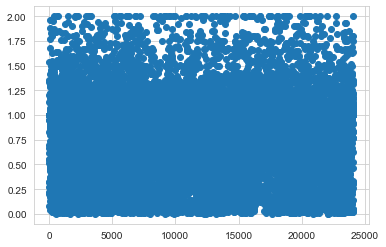

In [60]:
# EDA with numerical variables
plt.scatter(range(len(data)), data['EFraction'])
#plt.ylim([0,10])
plt.show()

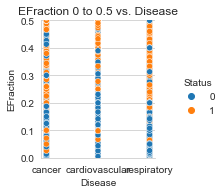

In [61]:
pairplot(data=data, 
             hue='Status',
             y_vars = ['EFraction'],
             x_vars = ['Disease'])
plt.ylim([0,0.5])
plt.title('EFraction 0 to 0.5 vs. Disease')
plt.show()

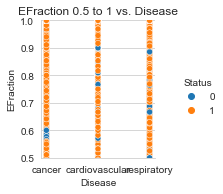

In [62]:
pairplot(data=data, 
             hue='Status',
             y_vars = ['EFraction'],
             x_vars = ['Disease'])
plt.ylim([0.5,1])
plt.title('EFraction 0.5 to 1 vs. Disease')
plt.show()

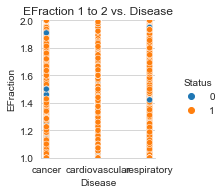

In [63]:
pairplot(data=data, 
             hue='Status',
             y_vars = ['EFraction'],
             x_vars = ['Disease'])
plt.ylim([1,2])
plt.title('EFraction 1 to 2 vs. Disease')
plt.show()

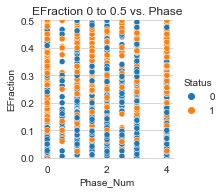

In [64]:
pairplot(data=data, 
             hue='Status',
             y_vars = ['EFraction'],
             x_vars = ['Phase_Num'])
plt.ylim([0,0.5])
plt.title('EFraction 0 to 0.5 vs. Phase')
plt.show()

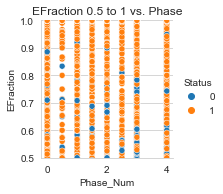

In [65]:
pairplot(data=data, 
             hue='Status',
             y_vars = ['EFraction'],
             x_vars = ['Phase_Num'])
plt.ylim([0.5,1])
plt.title('EFraction 0.5 to 1 vs. Phase')
plt.show()

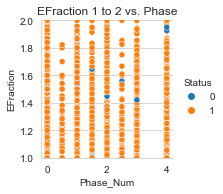

In [66]:
pairplot(data=data, 
             hue='Status',
             y_vars = ['EFraction'],
             x_vars = ['Phase_Num'])
plt.ylim([1, 2])
plt.title('EFraction 1 to 2 vs. Phase')
plt.show()

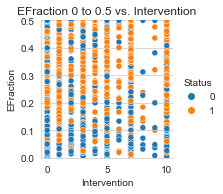

In [67]:
pairplot(data=data, 
             hue='Status',
             y_vars = ['EFraction'],
             x_vars = ['Intervention'])
plt.ylim([0,0.5])
plt.title('EFraction 0 to 0.5 vs. Intervention')
plt.show()

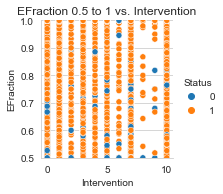

In [68]:
pairplot(data=data, 
             hue='Status',
             y_vars = ['EFraction'],
             x_vars = ['Intervention'])
plt.ylim([0.5,1])
plt.title('EFraction 0.5 to 1 vs. Intervention')
plt.show()

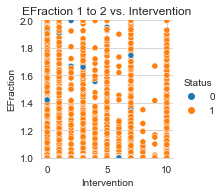

In [69]:
pairplot(data=data, 
             hue='Status',
             y_vars = ['EFraction'],
             x_vars = ['Intervention'])
plt.ylim([1,2])
plt.title('EFraction 1 to 2 vs. Intervention')
plt.show()

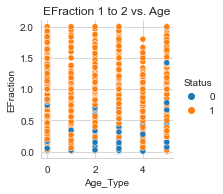

In [70]:
pairplot(data=data, 
             hue='Status',
             y_vars = ['EFraction'],
             x_vars = ['Age_Type'])
plt.title('EFraction 1 to 2 vs. Age')
plt.ylim
plt.show()

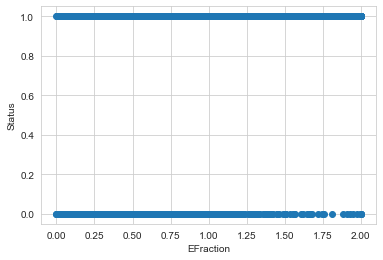

In [72]:
plt.scatter(data['EFraction'], data['Status'])
plt.xlabel('EFraction')
plt.ylabel('Status')
plt.show()

## Model Proposed
- Logistic Regression onto Status of Trial based on select Features:
        - `EFraction`
        -  And select subfeatures to determine Status
                - `Age`
                - `Month`
                - `Phase`
                - `Country`
                - `Disease`
                - `Intervention`